Unique labels and counts: (array([0, 1, 2, 3, 4, 6, 7]), array([2142701,  800800,  430500,  253400,  537599,   45500,   44800],
      dtype=int64))
Found 800800 baseline samples
Found 430500 stress samples


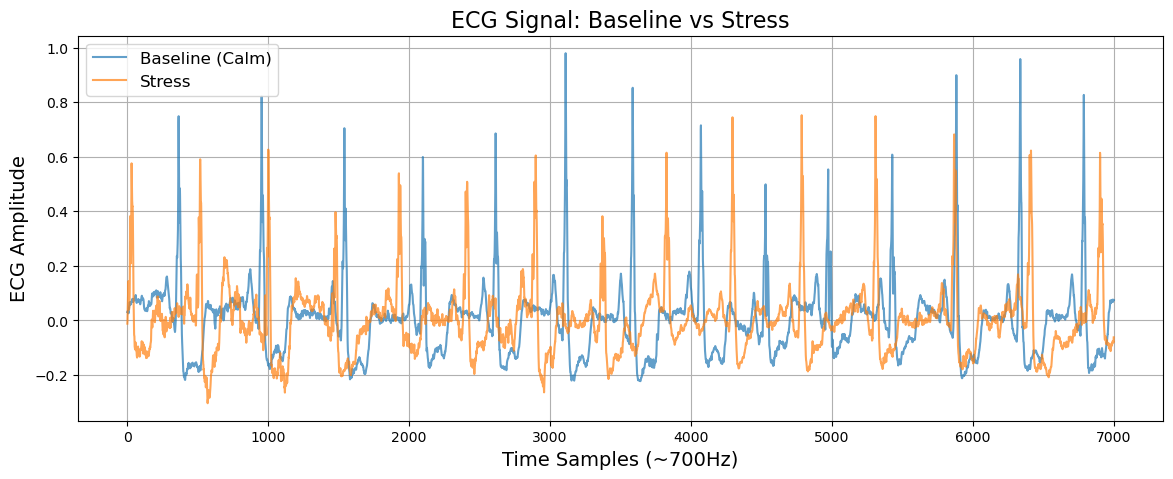

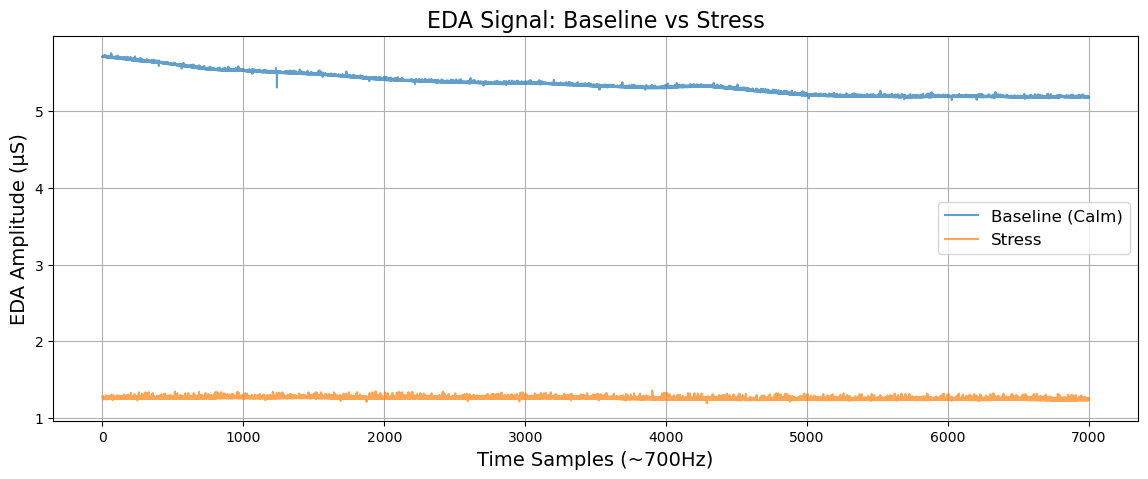

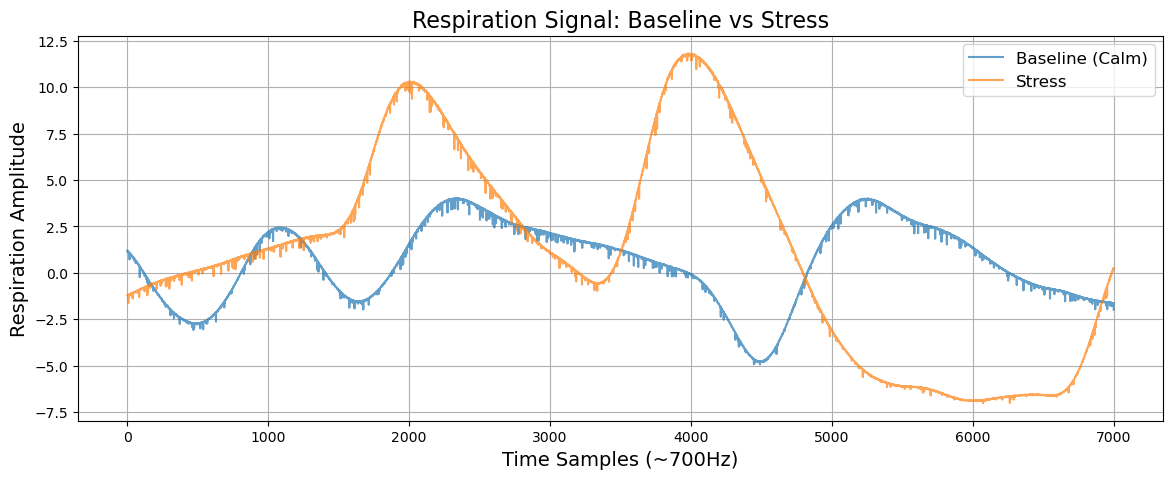

In [3]:
# Import libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load WESAD S2.pkl safely (Full load)
with open('D:/WESAD/WESAD/S2/S2.pkl', 'rb') as file:
    full_data = pickle.load(file, encoding='latin1')

# Step 2: Flatten full signals (no slicing here!)
ecg_signal = full_data['signal']['chest']['ECG'].flatten()
eda_signal = full_data['signal']['chest']['EDA'].flatten()
resp_signal = full_data['signal']['chest']['Resp'].flatten()
labels = full_data['label']

# Free memory
del full_data

# Step 3: Check available labels
print("Unique labels and counts:", np.unique(labels, return_counts=True))

# Step 4: Find baseline and stress indices (from full labels)
baseline_indices = np.where(labels == 1)[0]
stress_indices = np.where(labels == 2)[0]

print(f"Found {len(baseline_indices)} baseline samples")
print(f"Found {len(stress_indices)} stress samples")

# Step 5: Select ~10 seconds (7000 samples) for each
baseline_sample_idx = baseline_indices[:7000]
stress_sample_idx = stress_indices[:7000]

# Step 6: Plot ECG
plt.figure(figsize=(14,5))
plt.plot(ecg_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
plt.plot(ecg_signal[stress_sample_idx], label='Stress', alpha=0.7)
plt.title('ECG Signal: Baseline vs Stress', fontsize=16)
plt.xlabel('Time Samples (~700Hz)', fontsize=14)
plt.ylabel('ECG Amplitude', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Step 7: Plot EDA
plt.figure(figsize=(14,5))
plt.plot(eda_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
plt.plot(eda_signal[stress_sample_idx], label='Stress', alpha=0.7)
plt.title('EDA Signal: Baseline vs Stress', fontsize=16)
plt.xlabel('Time Samples (~700Hz)', fontsize=14)
plt.ylabel('EDA Amplitude (µS)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Step 8: Plot Respiration
plt.figure(figsize=(14,5))
plt.plot(resp_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
plt.plot(resp_signal[stress_sample_idx], label='Stress', alpha=0.7)
plt.title('Respiration Signal: Baseline vs Stress', fontsize=16)
plt.xlabel('Time Samples (~700Hz)', fontsize=14)
plt.ylabel('Respiration Amplitude', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


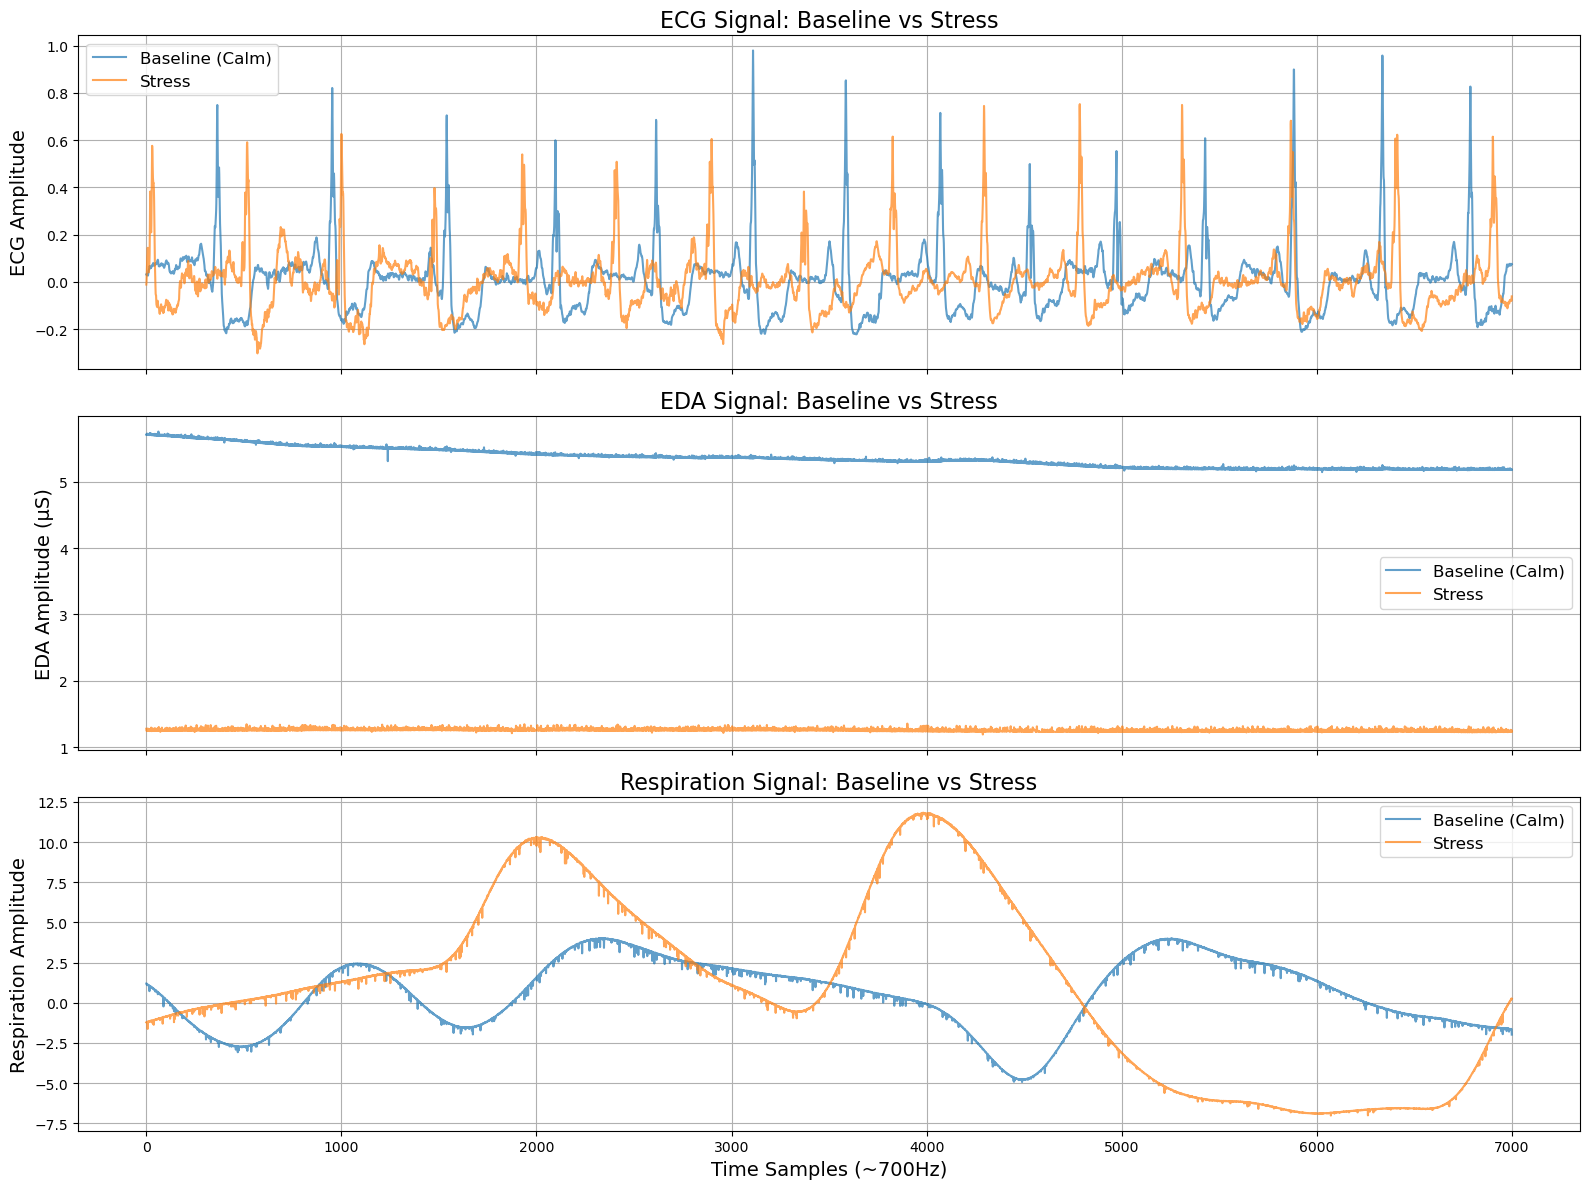

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load WESAD S2.pkl safely (Full load)
with open('D:/COAI_paper/WESAD/WESAD/S2/S2.pkl', 'rb') as file:
     full_data = pickle.load(file, encoding='latin1')

# Step 2: Flatten full signals (no slicing here!)
ecg_signal = full_data['signal']['chest']['ECG'].flatten()
eda_signal = full_data['signal']['chest']['EDA'].flatten()
resp_signal = full_data['signal']['chest']['Resp'].flatten()
labels = full_data['label']
del full_data  # Free memory

# Step 3: Find baseline and stress indices
baseline_indices = np.where(labels == 1)[0]
stress_indices = np.where(labels == 2)[0]

# Step 4: Select ~10 seconds (7000 samples) for each
baseline_sample_idx = baseline_indices[:7000]
stress_sample_idx = stress_indices[:7000]

# Step 5: Create a single figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# ECG
axs[0].plot(ecg_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
axs[0].plot(ecg_signal[stress_sample_idx], label='Stress', alpha=0.7)
axs[0].set_title('ECG Signal: Baseline vs Stress', fontsize=16)
axs[0].set_ylabel('ECG Amplitude', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# EDA
axs[1].plot(eda_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
axs[1].plot(eda_signal[stress_sample_idx], label='Stress', alpha=0.7)
axs[1].set_title('EDA Signal: Baseline vs Stress', fontsize=16)
axs[1].set_ylabel('EDA Amplitude (µS)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Respiration
axs[2].plot(resp_signal[baseline_sample_idx], label='Baseline (Calm)', alpha=0.7)
axs[2].plot(resp_signal[stress_sample_idx], label='Stress', alpha=0.7)
axs[2].set_title('Respiration Signal: Baseline vs Stress', fontsize=16)
axs[2].set_xlabel('Time Samples (~700Hz)', fontsize=14)
axs[2].set_ylabel('Respiration Amplitude', fontsize=14)
axs[2].legend(fontsize=12)
axs[2].grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig("WESAD_S2_Physiological_Signals.png", dpi=300, bbox_inches='tight')
plt.show()


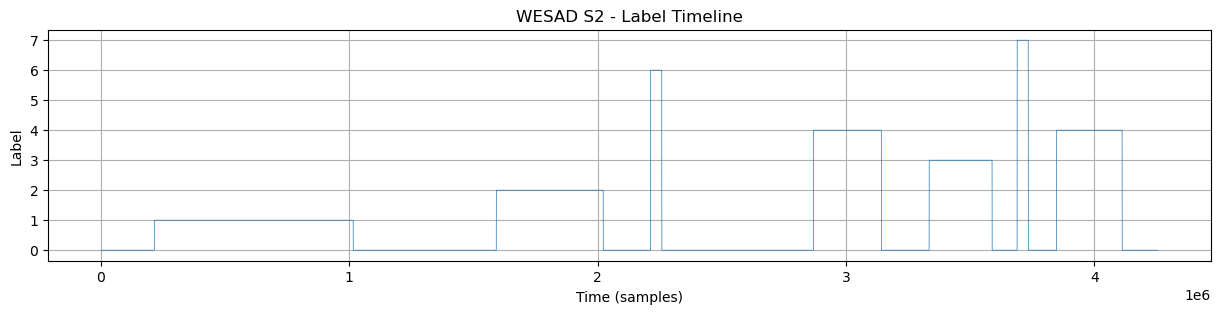

In [9]:
import matplotlib.pyplot as plt

with open(r"D:\COAI_paper\WESAD\WESAD\S2\S2.pkl", 'rb') as f:
    data = pickle.load(f, encoding='latin1')
    labels = data['label']

plt.figure(figsize=(15, 3))
plt.plot(labels, lw=0.5)
plt.title("WESAD S2 - Label Timeline")
plt.xlabel("Time (samples)")
plt.ylabel("Label")
plt.grid(True)
plt.show()


In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load full pickle
with open('D:/COAI_paper/WESAD/WESAD/S2/S2.pkl', 'rb') as file:
    full_data = pickle.load(file, encoding='latin1')

# Now load from around Stress task start
start_idx = 600000
end_idx = 950000

# Slice
ecg_signal = full_data['signal']['chest']['ECG'][start_idx:end_idx].flatten()
eda_signal = full_data['signal']['chest']['EDA'][start_idx:end_idx].flatten()
resp_signal = full_data['signal']['chest']['Resp'][start_idx:end_idx].flatten()
labels = full_data['label'][start_idx:end_idx]

del full_data

# Check labels again
print("Unique labels and counts:", np.unique(labels, return_counts=True))

# Find baseline and stress
baseline_indices = np.where(labels == 1)[0]
stress_indices = np.where(labels == 2)[0]

print(f"Found {len(baseline_indices)} baseline samples")
print(f"Found {len(stress_indices)} stress samples")


Unique labels and counts: (array([1]), array([350000], dtype=int64))
Found 350000 baseline samples
Found 0 stress samples


In [1]:
import pickle
import numpy as np

# Step 1: Load WESAD S2.pkl
file_path = 'D:/WESAD/WESAD/S2/S2.pkl'  # Update if different

with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

# Step 2: Check dataset structure
print("\nMain keys in the dataset:")
print(data.keys())

print("\nSub-keys inside 'signal':")
print(data['signal'].keys())

print("\nSub-keys inside 'signal[chest]':")
print(data['signal']['chest'].keys())

# Step 3: Check number of samples

# Check shape of one main signal (ECG) and labels
ecg_shape = data['signal']['chest']['ECG'].shape
labels_shape = data['label'].shape

print(f"\nShape of ECG signal: {ecg_shape}")
print(f"Shape of Labels array: {labels_shape}")

# Step 4: Check label classes
unique_labels, label_counts = np.unique(data['label'], return_counts=True)

print("\nUnique label values and their counts:")
for label, count in zip(unique_labels, label_counts):
    print(f"Label {label}: {count} samples")

# Step 5: Check total recording time (roughly)
sampling_rate = 700  # Chest devices in WESAD have ~700Hz sampling
recording_seconds = labels_shape[0] / sampling_rate
recording_minutes = recording_seconds / 60

print(f"\nApproximate recording length: {recording_minutes:.2f} minutes")



Main keys in the dataset:
dict_keys(['signal', 'label', 'subject'])

Sub-keys inside 'signal':
dict_keys(['chest', 'wrist'])

Sub-keys inside 'signal[chest]':
dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])

Shape of ECG signal: (4255300, 1)
Shape of Labels array: (4255300,)

Unique label values and their counts:
Label 0: 2142701 samples
Label 1: 800800 samples
Label 2: 430500 samples
Label 3: 253400 samples
Label 4: 537599 samples
Label 6: 45500 samples
Label 7: 44800 samples

Approximate recording length: 101.32 minutes


In [7]:
# Select indices
baseline_indices = np.where(data['label'] == 1)[0]
stress_indices = np.where(data['label'] == 2)[0]

print(f"Found {len(baseline_indices)} baseline samples")
print(f"Found {len(stress_indices)} stress samples")

# Then select small samples to plot (~7000 samples each, ~10 seconds)
baseline_sample = baseline_indices[:7000]
stress_sample = stress_indices[:7000]

# Access EDA, ECG, Resp
ecg_signal = data['signal']['chest']['ECG'].flatten()
eda_signal = data['signal']['chest']['EDA'].flatten()
resp_signal = data['signal']['chest']['Resp'].flatten()

# Plot ECG, EDA, Respiration separately


NameError: name 'data' is not defined